## Real or Not? NLP with Disaster Tweets

Predict which Tweets are about real disasters and which ones are not.
> We are predicting whether a given tweet is about a real disaster or not. If so, predict a 1. If not, predict a 0.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
train = pd.read_csv('./tweet/train.csv')
test = pd.read_csv('./tweet/test.csv')
submission = pd.read_csv('./tweet/sample_submission.csv')

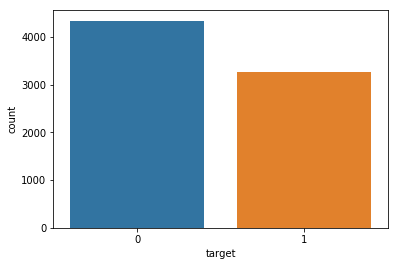

In [4]:
target = train['target']
sns.countplot(target)
train.drop(['target'], inplace=True, axis=1)

In [5]:
# concatenated train and test set
def concate_df(train, test):
    return pd.concat([train,test], sort=True).reset_index(drop=True)

In [6]:
df_all = concate_df(train, test)

In [8]:
print(train.shape)
print(test.shape)
print(df_all.shape)

(7613, 4)
(3263, 4)
(10876, 4)


In [9]:
df_all.head()

,id,keyword,location,text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...


In [11]:
df_all.describe()

,id
count,10876.000000
mean,5437.500000
std,3139.775098
min,0.000000
25%,2718.750000
50%,5437.500000
75%,8156.250000
max,10875.000000


In [13]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10876 entries, 0 to 10875
Data columns (total 4 columns):
id          10876 non-null int64
keyword     10789 non-null object
location    7238 non-null object
text        10876 non-null object
dtypes: int64(1), object(3)
memory usage: 340.0+ KB


In [15]:
features = ['keyword','location']
for feat in features : 
    print("The number of missing values in "+ str(feat)+" is "+str(df_all[feat].isnull().sum())
          + " for the combined dataset")
    print("The number of missing values in "+ str(feat)+" is "+str(train[feat].isnull().sum())
          + " for the train dataset")
    print("The number of missing values in "+ str(feat)+" is "+str(test[feat].isnull().sum())
          + " for the test dataset")

The number of missing values in keyword is 87 for the combined dataset
The number of missing values in keyword is 61 for the train dataset
The number of missing values in keyword is 26 for the test dataset
The number of missing values in location is 3638 for the combined dataset
The number of missing values in location is 2533 for the train dataset
The number of missing values in location is 1105 for the test dataset


In [20]:
# check if any keyword are missing in train set but present in test set
keyw_train = train['keyword'].unique()
keyw_test = test['keyword'].unique()
print(set(keyw_train)==set(keyw_test))

True


In [22]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [23]:
sentences = train['text']
train_size = int(7613*0.8)
train_sentences = sentences[:train_size]
train_labels = target[:train_size]

test_sentences = sentences[train_size:]
test_labels = target[train_size:]

# parameters of tokenizer
embedding_dim = 16
vocab_size = 10000
max_lenght = 120
trunc_type = 'post'
oov_tok = "<OOV>"

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)

word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(train_sentences)
padded = pad_sequences(sequences, maxlen=max_lenght, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(test_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_lenght, truncating=trunc_type)

In [24]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_lenght),
    tf.keras.layers.GlobalAvgPool1D(),
    tf.keras.layers.Dense(14, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [25]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 14)                238       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 15        
Total params: 160,253
Trainable params: 160,253
Non-trainable params: 0
_________________________________________________________________


In [27]:
num_epochs = 10
history = model.fit(padded, train_labels, epochs=num_epochs, validation_data=(testing_padded, test_labels))

ValueError: Failed to find data adapter that can handle input: <class 'numpy.ndarray'>, <class 'pandas.core.series.Series'>

In [28]:
import matplotlib.pyplot as plt

def plot(history,string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
plot(history, "accuracy")
plot(history, 'loss')

NameError: name 'history' is not defined

In [ ]:
final_output = []
for val in pred_plot.target:
    if val > 0.5:
        final_output.append(1)
    else:
        final_output.append(0)

In [ ]:
submission['target'] = final_output
# submission['id'] = test['id']
submission.to_csv("final.csv", index=False)
submission.head()